In [3]:
import sys
sys.path.append('../')

In [4]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline

from plants_and_TCR.analysis_parameters import get_CMIP_info
from plants_and_TCR.analysis_parameters import directory_information
from plants_and_TCR.generate_figures import quick_map
from plants_and_TCR.generate_figures import plot_scatter_CMIP
from plants_and_TCR.analyze_data import multi_model_stats
from plants_and_TCR.analyze_data import make_tcr_dataset
from plants_and_TCR.process_data import calculate_tcr_time_series

In [6]:
DIR_TCR_DICT = directory_information.DIR_TCR_DICT
DIR_REGRIDDED_DATA = directory_information.DIR_PROCESSED_DATA
DIR_FIGURES = directory_information.DIR_OUTPUT_FIGURES

TCR_DICT = pickle.load(open(DIR_TCR_DICT+'TCR_dict.pickle','rb'))

In [17]:
from plants_and_TCR.process_data import make_processed_data_dict
RUNNAMES = ['1pctCO2', '1pctCO2-rad','1pctCO2-bgc','piControl']
PROC_DATA_DICT = make_processed_data_dict.create_variable_dictionary(runnames=RUNNAMES,
                                                                     varname='tas',
                                                                     input_path=DIR_REGRIDDED_DATA,
                                                                     cdict_names=['CMIP5','CMIP6'])

tas_1pctCO2-bgc_CMIP6_NorESM2-LM is not in the dictionary


In [18]:
RUNNAME_INDS= [2,0] #[1,3] #[2,0]
VARNAME='tas'
CMIP_NAMES=['CMIP6']

In [25]:
[ds_all_models_phys1_70yr,
 _,
 positiveChangeCount_phys1_70yr,
 _,
 num_phys1_70yr] = multi_model_stats.get_mm_mean(proc_data_dict=PROC_DATA_DICT,
                                                                 varname=VARNAME,
                                                                 end_yr=70,
                                                                 change_cutoff=0,
                                                                 runname_inds=[2,0],
                                                                 cmip_names = CMIP_NAMES) 


[ds_all_models_phys1_130yr,
 _,
 positiveChangeCount_phys1_130yr,
 _,
 num_phys1_130yr] = multi_model_stats.get_mm_mean(proc_data_dict=PROC_DATA_DICT,
                                                                  varname=VARNAME,
                                                                  end_yr=130,
                                                                  change_cutoff=0,
                                                                  runname_inds=[2,0],
                                                                  cmip_names = CMIP_NAMES) 

[ds_all_models_phys2_70yr,
 _,
 positiveChangeCount_phys2_70yr,
 _,
 num_phys2_70yr] = multi_model_stats.get_mm_mean(proc_data_dict=PROC_DATA_DICT,
                                                                 varname=VARNAME,
                                                                 end_yr=70,
                                                                 change_cutoff=0,
                                                                 runname_inds=[1,3],
                                                                 cmip_names = CMIP_NAMES) 


[ds_all_models_phys2_130yr,
 _,
 positiveChangeCount_phys2_130yr,
 _,
 num_phys2_130yr] = multi_model_stats.get_mm_mean(proc_data_dict=PROC_DATA_DICT,
                                                                  varname=VARNAME,
                                                                  end_yr=130,
                                                                  change_cutoff=0,
                                                                  runname_inds=[1,3],
                                                                  cmip_names = CMIP_NAMES)

CNRM-ESM2-1
BCC-CSM2-MR
CanESM5
CESM2
GISS-E2-1-G
UKESM1-0-LL
GFDL-ESM4
IPSL-CM6A-LR
MIROC-ES2L
NorESM2-LM
MPI-ESM1-2-LR
ACCESS-ESM1-5
CNRM-ESM2-1
BCC-CSM2-MR
CanESM5
CESM2
GISS-E2-1-G
UKESM1-0-LL
GFDL-ESM4
IPSL-CM6A-LR
MIROC-ES2L
NorESM2-LM
MPI-ESM1-2-LR
ACCESS-ESM1-5
CNRM-ESM2-1
BCC-CSM2-MR
CanESM5
CESM2
GISS-E2-1-G
UKESM1-0-LL
GFDL-ESM4
IPSL-CM6A-LR
MIROC-ES2L
NorESM2-LM
No data for NorESM2-LM
MPI-ESM1-2-LR
ACCESS-ESM1-5
CNRM-ESM2-1
BCC-CSM2-MR
CanESM5
CESM2
GISS-E2-1-G
UKESM1-0-LL
GFDL-ESM4
IPSL-CM6A-LR
MIROC-ES2L
NorESM2-LM
No data for NorESM2-LM
MPI-ESM1-2-LR
ACCESS-ESM1-5


Models with data: 12


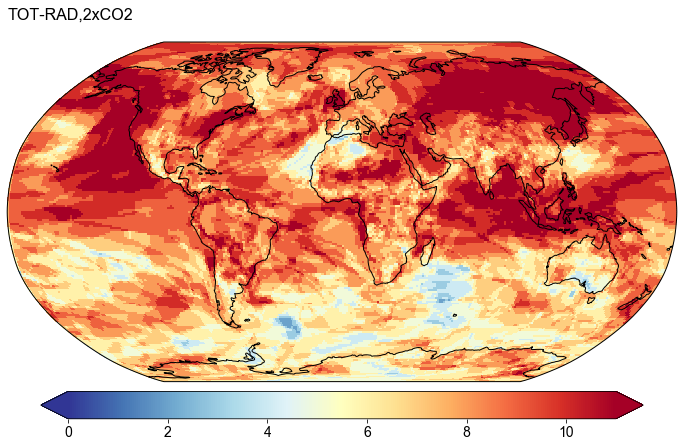

done saving file
Models with data: 12


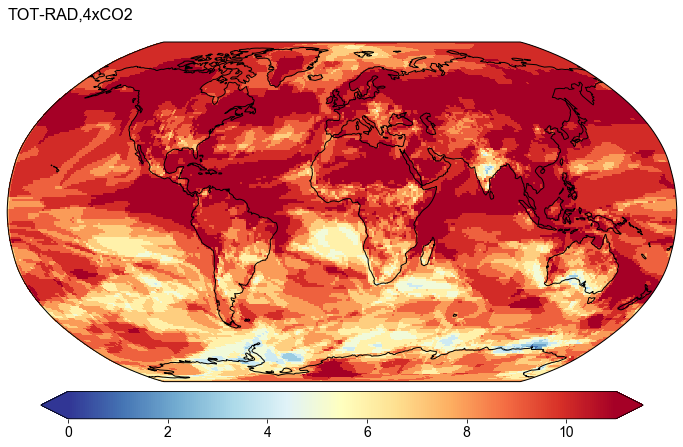

done saving file
Models with data: 11


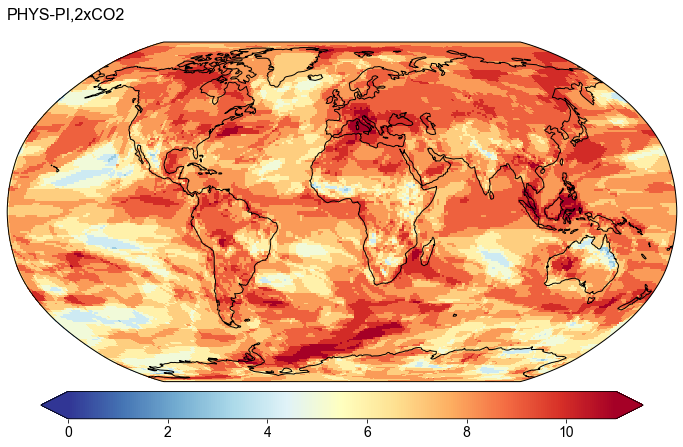

done saving file
Models with data: 11


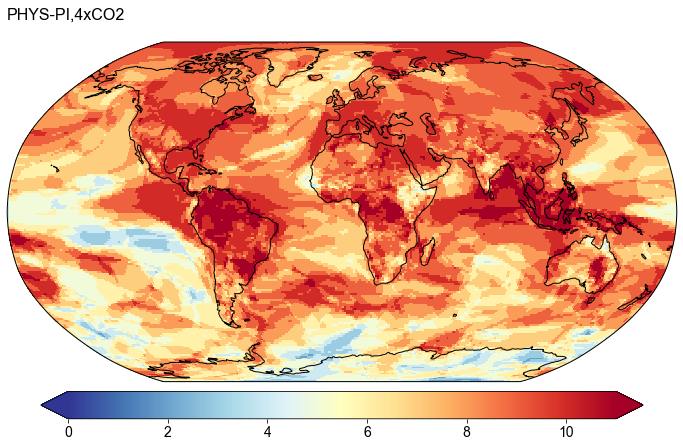

done saving file


In [28]:
ds_list = [positiveChangeCount_phys1_70yr, positiveChangeCount_phys1_130yr,
           positiveChangeCount_phys2_70yr, positiveChangeCount_phys2_130yr]
titles=['TOT-RAD,2xCO2','TOT-RAD,4xCO2', 'PHYS-PI,2xCO2','PHYS-PI,4xCO2']
nums_available = [num_phys1_70yr,num_phys1_130yr,num_phys2_70yr,num_phys2_130yr]
for i,ds in enumerate(ds_list):
    print('Models with data: '+str(nums_available[i]))
    quick_map.quick_map(ds.values,
                        ds['lat'].values,
                        ds['lon'].values,
                        clim=[0,11],
                        cmap=plt.cm.RdYlBu_r,
                        title=titles[i],
                        filepath=DIR_FIGURES+titles[i])